In [1]:

import os

import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys

import matplotlib.pylab as pl

# set data path
dir_path = pathlib.Path().absolute()
file = '../data/MOM4_data.csv'
data_path = os.path.join(dir_path, file)
print('MOM4 data located at:', data_path)

# read data
df = pd.read_csv(data_path, index_col=False).drop(['Unnamed: 0'], axis=1)
df.reset_index(drop=True, inplace=True)
assert df.isnull().sum().sum() == 0

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()


MOM4 data located at: /home/user/Documents/ky-bayesopt/data_analysis/../data/MOM4_data.csv


,CRD,PartType,Orient.,X,Y,SPI_VOLUME1,SPI_VOLUME2,SPI_X1,SPI_Y1,SPI_X2,SPI_Y2,SPI_L1,SPI_W1,SPI_L2,SPI_W2,SPI_L,SPI_W,PRE_X,PRE_Y,PRE_A,PRE_L,PRE_W,POST_X,POST_Y,POST_A,POST_L,POST_W,Job,Chip_L,Chip_W,SPI_R,PRE_R,POST_R,SPI_VOLUME_MEAN,SPI_VOLUME_DIFF
0,B1,R0402,90,31.26,100.11,81.7355,75.6950,-51.9,63.3,-52.1,60.5,63.3,51.9,60.5,52.1,61.90,52.0,-19.887293,-1.840963,-1.877,-1.840963,19.887293,-7.440417,28.108231,1.613,28.108231,7.440417,CENTER,400.0,200.0,80.843120,19.972320,29.076321,78.71525,6.0405
1,B2,R0402,90,31.83,100.11,83.1555,71.5083,-45.7,66.1,-48.3,61.3,66.1,45.7,61.3,48.3,63.70,47.0,-26.766272,6.898049,-1.449,6.898049,26.766272,5.487133,22.242701,0.000,22.242701,-5.487133,CENTER,400.0,200.0,79.162428,27.640847,22.909526,77.33190,11.6472
2,B3,R0402,90,32.40,100.11,87.0870,67.2606,-48.6,75.8,-34.6,68.9,75.8,48.6,68.9,34.6,72.35,41.6,-32.058273,8.125244,-3.278,8.125244,32.058273,-19.644203,12.971593,1.552,12.971593,19.644203,CENTER,400.0,200.0,83.457070,33.071929,23.540538,77.17380,19.8264
3,B4,R0402,90,32.97,100.11,80.0433,75.8866,-56.3,65.8,-44.9,60.4,65.8,56.3,60.4,44.9,63.10,50.6,-23.437572,-6.195457,-3.337,-6.195457,23.437572,-22.517658,26.396389,0.000,26.396389,22.517658,CENTER,400.0,200.0,80.882446,24.242596,34.696027,77.96495,4.1567
4,B5,R0402,90,33.54,100.11,76.7088,74.0452,-48.9,69.7,-51.1,69.2,69.7,48.9,69.2,51.1,69.45,50.0,-5.187286,7.085744,-3.408,7.085744,5.187286,-21.413681,29.193306,3.611,29.193306,21.413681,CENTER,400.0,200.0,85.576296,8.781555,36.204901,75.37700,2.6636


In [12]:
'''
filter by SPI L, W direction to see if the two subsets show a similar pattern (in which case we can aggregate the two as one)
'''

# import time
df_copy = df.copy()
dfgroups = df_copy.groupby(['PartType','Orient.'])
t = tqdm(dfgroups)
for idx, (name, group) in enumerate(t):
    t.set_description(f'checking: {name}\n')
    chiptype, orient = name

    quadrant = [[] for _ in range(4)] # counter for each quadrant
    
    if name == ('R1005', 90) or name == ('R1005', 0) or name == ('R0603', 0) or name == ('R0603', 90) or name == ('R0402', 0) or name == ('R0402', 90):
        for grp_idx, row in group.iterrows():
            # print('\n', row[['SPI_L','SPI_W']])
            x = row['SPI_L']
            y = row['SPI_W']
            if x >= 0 and y >= 0:   # x,y: +,+
                # quadrant[0] += 1
                quadrant[0].append(grp_idx)
            elif x < 0 and y >= 0:   # x,y: -,+
                # quadrant[1] += 1
                quadrant[1].append(grp_idx)
            elif x < 0 and y < 0:   # x,y: -,-
                # quadrant[2] += 1
                quadrant[2].append(grp_idx)
            elif x >= 0 and y < 0:   # x,y: +,-
                # quadrant[3] += 1
                quadrant[3].append(grp_idx)
        # print('\n')
        # print(name)
        print([len(quad) for quad in quadrant])
        
        # extract two subsets, by the SPI L, W directions - by W direction
        # subset1 = df_copy.iloc[quadrant[0] + quadrant[3]]   # quadrants 1 and 4
        # subset2 = df_copy.iloc[quadrant[1] + quadrant[2]]   # quadrants 2 and 3

        # extract two subsets, by the SPI L, W directions - by L direction
        subset1 = df_copy.iloc[quadrant[0] + quadrant[1]]   # quadrants 1 and 2
        subset2 = df_copy.iloc[quadrant[2] + quadrant[3]]   # quadrants 3 and 4

        subset1.to_csv(f'./{name}_1.csv')
        subset2.to_csv(f'./{name}_2.csv')
        

checking: ('R0402', 0)
:   0%|          | 0/6 [00:00<?, ?it/s][9109, 9941, 4950, 6375]
checking: ('R0402', 0)
checking: ('R0402', 90)
:  17%|█▋        | 1/6 [00:02<00:11,  2.22s/it][7091, 8219, 9256, 5809]
checking: ('R0402', 90)
checking: ('R0603', 0)
:  33%|███▎      | 2/6 [00:04<00:08,  2.20s/it] [7581, 9131, 6800, 6862]
checking: ('R0603', 0)
checking: ('R0603', 90)
:  50%|█████     | 3/6 [00:06<00:06,  2.19s/it][7510, 7792, 8453, 6620]
checking: ('R0603', 90)
checking: ('R1005', 0)
:  67%|██████▋   | 4/6 [00:08<00:04,  2.21s/it] [8045, 8069, 7115, 7145]
checking: ('R1005', 0)
checking: ('R1005', 90)
:  83%|████████▎ | 5/6 [00:11<00:02,  2.20s/it][7825, 6673, 8641, 7235]
checking: ('R1005', 90)
checking: ('R1005', 90)
: 100%|██████████| 6/6 [00:13<00:00,  2.21s/it]


In [4]:
def negate_x(x):
    # force subset2 (quad 2,3) --> subset1 (quad 1,4)
    return -1 * x

def plot_hist2d(x, y, xlabel, ylabel, title):
    import matplotlib.cm as cm
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=histogram_bin_size)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    img = axis.imshow(heatmap.T, extent=extent, origin='lower',cmap=cm.jet) #cmap=cm.PuBu_r)

    axis.set_ylim([0, 100])
    axis.set_xlim([0, 100])
    axis.set_title(file1.split('_')[0].split('/')[0])
    axis.grid()
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_title(title)
    

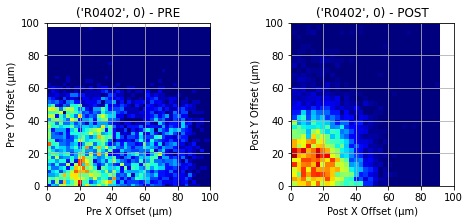

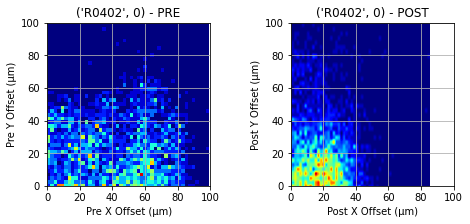

In [18]:
# R0402

''' load each subsets per (chip, orientation) condition '''
chip = 'R0402'
file1 = f"./({chip!r}, 0)_1.csv"
file2 = f"./({chip!r}, 0)_2.csv"
subset_path1 = os.path.join(dir_path, file1)
subset_path2 = os.path.join(dir_path, file2)

df_subset1 = pd.read_csv(subset_path1, index_col=False).drop(['Unnamed: 0'], axis=1)
df_subset2 = pd.read_csv(subset_path2, index_col=False).drop(['Unnamed: 0'], axis=1)
df_subset1.reset_index(drop=True, inplace=True)
df_subset2.reset_index(drop=True, inplace=True)
assert df_subset1.isnull().sum().sum() == 0
assert df_subset2.isnull().sum().sum() == 0

# df_subset1[['SPI_L','SPI_W']].head(10) # quadrant 1
# df_subset1[['SPI_L','SPI_W']].tail(10) # quadrant 2

# df_subset2[['SPI_L','SPI_W']].head(10) # quadrant 3
# df_subset2[['SPI_L','SPI_W']].tail(10) # quadrant 4


''' analyze the two subsets '''
# pre vs. post in histogram 2d
histogram_bin_size = 100

fig = plt.figure(figsize=(8,3))
axis = fig.add_subplot(1,2,1)
xvar, yvar = 'PRE_X', 'PRE_Y'
x = df_subset1[xvar].to_numpy()
y = df_subset1[yvar].to_numpy()
plot_hist2d(x, y, xlabel='Pre X Offset (\u03BCm)', ylabel='Pre Y Offset (\u03BCm)', title=file1.split('_')[0].split('/')[1] + ' - PRE')

axis = fig.add_subplot(1,2,2)
xvar, yvar = 'POST_X', 'POST_Y'
x = df_subset1[xvar].to_numpy()
y = df_subset1[yvar].to_numpy()
plot_hist2d(x, y, xlabel='Post X Offset (\u03BCm)', ylabel='Post Y Offset (\u03BCm)', title=file1.split('_')[0].split('/')[1] + ' - POST')

plt.savefig(f"{file1.split('_')[0].split('/')[1]} + ' - 1'.png", dpi=300, bbox_inches='tight')

fig = plt.figure(figsize=(8,3))
axis = fig.add_subplot(1,2,1)
xvar, yvar = 'PRE_X', 'PRE_Y'
x = df_subset2[xvar].to_numpy()
y = df_subset2[yvar].to_numpy()
# x = negate_x(x)
plot_hist2d(x, y, xlabel='Pre X Offset (\u03BCm)', ylabel='Pre Y Offset (\u03BCm)', title=file2.split('_')[0].split('/')[1] + ' - PRE')

axis = fig.add_subplot(1,2,2)
xvar, yvar = 'POST_X', 'POST_Y'
x = df_subset2[xvar].to_numpy()
y = df_subset2[yvar].to_numpy()
# x = negate_x(x)
plot_hist2d(x, y, xlabel='Post X Offset (\u03BCm)', ylabel='Post Y Offset (\u03BCm)', title=file2.split('_')[0].split('/')[1] + ' - POST')

plt.savefig(f"{file1.split('_')[0].split('/')[1]} + ' - 2'.png", dpi=300, bbox_inches='tight')




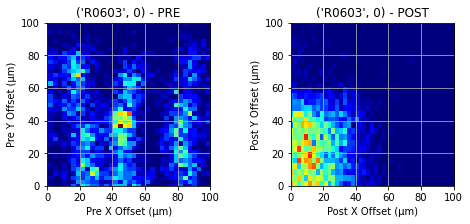

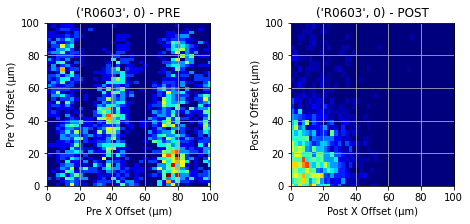

In [17]:
# R0603

''' load each subsets per (chip, orientation) condition '''
chip = 'R0603'
file1 = f"./({chip!r}, 0)_1.csv"
file2 = f"./({chip!r}, 0)_2.csv"
subset_path1 = os.path.join(dir_path, file1)
subset_path2 = os.path.join(dir_path, file2)

df_subset1 = pd.read_csv(subset_path1, index_col=False).drop(['Unnamed: 0'], axis=1)
df_subset2 = pd.read_csv(subset_path2, index_col=False).drop(['Unnamed: 0'], axis=1)
df_subset1.reset_index(drop=True, inplace=True)
df_subset2.reset_index(drop=True, inplace=True)
assert df_subset1.isnull().sum().sum() == 0
assert df_subset2.isnull().sum().sum() == 0

# df_subset1[['SPI_L','SPI_W']].head(10) # quadrant 1
# df_subset1[['SPI_L','SPI_W']].tail(10) # quadrant 2

# df_subset2[['SPI_L','SPI_W']].head(10) # quadrant 3
# df_subset2[['SPI_L','SPI_W']].tail(10) # quadrant 4


''' analyze the two subsets '''
# pre vs. post in histogram 2d
histogram_bin_size = 100

fig = plt.figure(figsize=(8,3))
axis = fig.add_subplot(1,2,1)
xvar, yvar = 'PRE_X', 'PRE_Y'
x = df_subset1[xvar].to_numpy()
y = df_subset1[yvar].to_numpy()
plot_hist2d(x, y, xlabel='Pre X Offset (\u03BCm)', ylabel='Pre Y Offset (\u03BCm)', title=file1.split('_')[0].split('/')[1] + ' - PRE')

axis = fig.add_subplot(1,2,2)
xvar, yvar = 'POST_X', 'POST_Y'
x = df_subset1[xvar].to_numpy()
y = df_subset1[yvar].to_numpy()
plot_hist2d(x, y, xlabel='Post X Offset (\u03BCm)', ylabel='Post Y Offset (\u03BCm)', title=file1.split('_')[0].split('/')[1] + ' - POST')

plt.savefig(f"{file1.split('_')[0].split('/')[1]} + ' - 1'.png", dpi=300, bbox_inches='tight')

fig = plt.figure(figsize=(8,3))
axis = fig.add_subplot(1,2,1)
xvar, yvar = 'PRE_X', 'PRE_Y'
x = df_subset2[xvar].to_numpy()
y = df_subset2[yvar].to_numpy()
# x = negate_x(x)
plot_hist2d(x, y, xlabel='Pre X Offset (\u03BCm)', ylabel='Pre Y Offset (\u03BCm)', title=file2.split('_')[0].split('/')[1] + ' - PRE')

axis = fig.add_subplot(1,2,2)
xvar, yvar = 'POST_X', 'POST_Y'
x = df_subset2[xvar].to_numpy()
y = df_subset2[yvar].to_numpy()
# x = negate_x(x)
plot_hist2d(x, y, xlabel='Post X Offset (\u03BCm)', ylabel='Post Y Offset (\u03BCm)', title=file2.split('_')[0].split('/')[1] + ' - POST')

plt.savefig(f"{file1.split('_')[0].split('/')[1]} + ' - 2'.png", dpi=300, bbox_inches='tight')



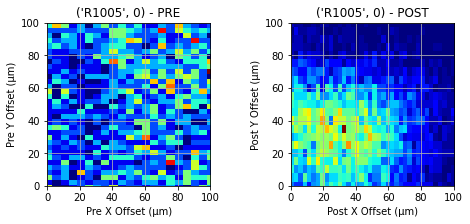

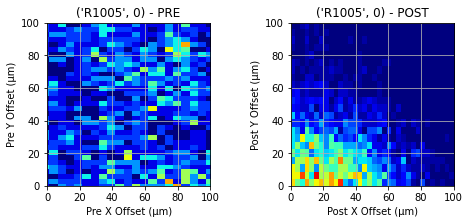

In [16]:
# R1005

''' load each subsets per (chip, orientation) condition '''
chip = 'R1005'
file1 = f"./({chip!r}, 0)_1.csv"
file2 = f"./({chip!r}, 0)_2.csv"
subset_path1 = os.path.join(dir_path, file1)
subset_path2 = os.path.join(dir_path, file2)

df_subset1 = pd.read_csv(subset_path1, index_col=False).drop(['Unnamed: 0'], axis=1)
df_subset2 = pd.read_csv(subset_path2, index_col=False).drop(['Unnamed: 0'], axis=1)
df_subset1.reset_index(drop=True, inplace=True)
df_subset2.reset_index(drop=True, inplace=True)
assert df_subset1.isnull().sum().sum() == 0
assert df_subset2.isnull().sum().sum() == 0

# df_subset1[['SPI_L','SPI_W']].head(10) # quadrant 1
# df_subset1[['SPI_L','SPI_W']].tail(10) # quadrant 2

# df_subset2[['SPI_L','SPI_W']].head(10) # quadrant 3
# df_subset2[['SPI_L','SPI_W']].tail(10) # quadrant 4


''' analyze the two subsets '''
# pre vs. post in histogram 2d
histogram_bin_size = 100

fig = plt.figure(figsize=(8,3))
axis = fig.add_subplot(1,2,1)
xvar, yvar = 'PRE_X', 'PRE_Y'
x = df_subset1[xvar].to_numpy()
y = df_subset1[yvar].to_numpy()
plot_hist2d(x, y, xlabel='Pre X Offset (\u03BCm)', ylabel='Pre Y Offset (\u03BCm)', title=file1.split('_')[0].split('/')[1] + ' - PRE')

axis = fig.add_subplot(1,2,2)
xvar, yvar = 'POST_X', 'POST_Y'
x = df_subset1[xvar].to_numpy()
y = df_subset1[yvar].to_numpy()
plot_hist2d(x, y, xlabel='Post X Offset (\u03BCm)', ylabel='Post Y Offset (\u03BCm)', title=file1.split('_')[0].split('/')[1] + ' - POST')

plt.savefig(f"{file1.split('_')[0].split('/')[1]} + ' - 1'.png", dpi=300, bbox_inches='tight')

fig = plt.figure(figsize=(8,3))
axis = fig.add_subplot(1,2,1)
xvar, yvar = 'PRE_X', 'PRE_Y'
x = df_subset2[xvar].to_numpy()
y = df_subset2[yvar].to_numpy()
# x = negate_x(x)
plot_hist2d(x, y, xlabel='Pre X Offset (\u03BCm)', ylabel='Pre Y Offset (\u03BCm)', title=file2.split('_')[0].split('/')[1] + ' - PRE')

axis = fig.add_subplot(1,2,2)
xvar, yvar = 'POST_X', 'POST_Y'
x = df_subset2[xvar].to_numpy()
y = df_subset2[yvar].to_numpy()
# x = negate_x(x)
plot_hist2d(x, y, xlabel='Post X Offset (\u03BCm)', ylabel='Post Y Offset (\u03BCm)', title=file2.split('_')[0].split('/')[1] + ' - POST')

plt.savefig(f"{file1.split('_')[0].split('/')[1]} + ' - 2'.png", dpi=300, bbox_inches='tight')



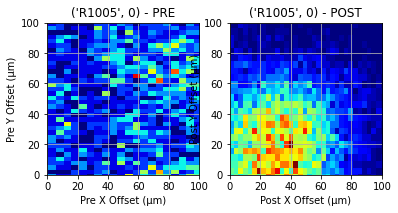

In [8]:
''' analyze the two subsets '''
def plot_hist2d(x, y, xlabel, ylabel, title):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=histogram_bin_size)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    img = axis.imshow(heatmap.T, extent=extent, origin='lower',cmap=cm.jet) #cmap=cm.PuBu_r)

    axis.set_ylim([0, 100])
    axis.set_xlim([0, 100])
    axis.set_title(file1.split('_')[0].split('/')[0])
    axis.grid()
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_title(title)

# pre vs. post in histogram 2d
import matplotlib.cm as cm
fig = plt.figure(figsize=(6,3))

histogram_bin_size = 100

axis = fig.add_subplot(1,2,1)
x = df_subset1['PRE_X'].to_numpy()
y = df_subset1['PRE_Y'].to_numpy()
plot_hist2d(x, y, xlabel='Pre X Offset (\u03BCm)', ylabel='Pre Y Offset (\u03BCm)', title=file1.split('_')[0].split('/')[1] + ' - PRE')

axis = fig.add_subplot(1,2,2)
x = df_subset1['POST_X'].to_numpy()
y = df_subset1['POST_Y'].to_numpy()
plot_hist2d(x, y, xlabel='Post X Offset (\u03BCm)', ylabel='Post Y Offset (\u03BCm)', title=file1.split('_')[0].split('/')[1] + ' - POST')



In [4]:

#### visualize (x, y)

# x1 = 'SPI_X1'
# y1 = 'SPI_Y1'
# x2 = 'SPI_X2'
# y2 = 'SPI_Y2'
xavg = 'SPI_X_AVG'
yavg = 'SPI_Y_AVG'

# temp#_df: contains SPI_X_AVG and SPI_Y_AVG
temp1_df = temp1[[xavg, yavg]]
temp2_df = temp2[[xavg, yavg]]
temp3_df = temp3[[xavg, yavg]]

# clustering
from collections import defaultdict

def list_duplicates(seq):
	tally = defaultdict(list)
	for i, item in enumerate(seq):
		tally[item].append(i)
	return ((key, locs) for key, locs in tally.items() if len(locs) > 1)


# 1. scikit learn - Kmeans
from sklearn.cluster import KMeans

missing_sample = dict()

fig = plt.figure(figsize=(18, 5), facecolor='white')
temp_dfs = [temp1_df, temp2_df, temp3_df]
# for temp_idx, temp_df in enumerate(temp_dfs):
jobs = ['Job_%d_%d'%(i,j) for i in range(9) for j in range(9)]
temp_idx = 0
for chip_type in ['R0402','R0603','R1005'] :
	for orient in [0, 90] :
		for job in jobs :
			temp_df = df.loc[(df['PartType'] == chip_type) & (df['Orient.'] == orient) & (df['Job'] == job)]
			temp_df = temp_df[['SPI_L', 'SPI_W']]
			kmeans = KMeans(n_clusters=25).fit(temp_df)
			centroids = kmeans.cluster_centers_
			label = kmeans.labels_.astype(int)

			l_means = KMeans(n_clusters=5).fit(centroids[:, 0].reshape(-1,1))
			l_centroids = l_means.cluster_centers_
			_label = np.argsort(l_centroids.reshape(-1))
			_label = np.asarray(range(5))[_label]
			_l_label = l_means.labels_.astype(int)
			l_label = _label[_l_label]

			w_means = KMeans(n_clusters=5).fit(centroids[:, 1].reshape(-1,1))
			w_centroids = w_means.cluster_centers_
			_label = np.argsort(w_centroids.reshape(-1))
			_label = np.asarray(range(5))[_label]
			_w_label = w_means.labels_.astype(int)
			w_label = _label[_w_label]

			df.set_value(temp_df.index.get_values(),'SPI_L_PERCENT',10 * (l_label[label] - 2))
			df.set_value(temp_df.index.get_values(),'SPI_W_PERCENT',10 * (w_label[label] - 2))

			if [chip_type, orient, job] in missing_case :
				missing_sample[temp_idx] = []
				for dup in sorted(list_duplicates(kmeans.labels_)):
					if len(temp_df.iloc[dup[1], :]) < 15:
						missing_sample[temp_idx] = (dup[0], dup[1])
						chip_orient_job = missing_chip[temp_idx]
						print(
							f'{chip_orient_job}: centroid {dup[0]} (Count: {len(temp_df.iloc[dup[1], :])})')  
							# ' \n {temp_df.iloc[dup[1],:]} \n') # lists corresponding row indices for each centroid
					else:
						continue
				temp_idx += 1
			# ax = fig.add_subplot(1, 3, temp_idx)
			# ax.scatter(temp_df[xavg], temp_df[yavg], c=kmeans.labels_.astype(float), s=50, alpha=0.5, label='SPI_AVG')
			# ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label='centroid')
			# ax.set_xlabel(f'{xavg} (\u03BCm)')
			# ax.set_ylabel(f'{yavg} (\u03BCm)')
			# ax.legend(loc='upper right')
			# ax.grid()
			# ax.set_title(missing_chip[temp_idx])
# plt.show()
# fig.savefig('./stencils.png')

# check: (parttype, orient, job) sample
print('Sample:\n')
print(missing_chip[0])
print(temps[0].head(1))

# check centroid values
# missing sample contains (centroid number, index in temp_dfs[i] for the centroid)
# temp_dfs contains dataframe corresponding to the chosen indices (for the centroids)
print('Centroids:\n')
for i, (k, v) in enumerate(missing_sample.items()):
	print(f'{missing_chip[k]}:\n(index: {v}), \n(df: {temp_dfs[i].iloc[v[1], :].head(1)})')


NameError: name 'temp1' is not defined

In [ ]:

# df_imputed.head(5)
